# Selective Withdrawal Phenomena and Entrainment

Here we'll study the critical moment when the withdrawal Phenomena transitions from selective to entrainment.

In [4]:
# Import required packages

import numpy as np
import pandas as pd 

%matplotlib inline 
# %matplotlib notebook #for displaying plots in the notebook under cells with interactivity 
# %matplotlib nbagg #for displaying plots in the notebook under cells with interactivity  


import os
for dirname, _, filenames in os.walk('C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))







C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\cohen.csv
C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\single.csv
C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\utube.csv


# Preparing single tube withdrawal form above data

In [5]:
# Loading data file

data_single = pd.read_csv("C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\single.csv")
data_single.head()


,Fluids,PDMS _rho (kg/m^3),PDMS_nu (cSt),Water_rho (kg/m^3),Water_nu (cSt),Interfacial Tension (N/m),Tube,ID (m),Flow Rate (GPM),Submergence S (in),Layer Depth (in),day,temp
0,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,2.95,0.338,1.0,1,27.5
1,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,3.03,0.393,1.0,1,25.4
2,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,3.05,0.381,1.0,1,26.7
3,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,3.49,0.392,1.0,1,26.7
4,5 cSt PDMS/DI water,918,5,998,1.01,0.03,1/2 SS,0.010795,3.53,0.441,1.0,1,26.7


In [6]:
data_single.columns=['fluids', 'upper_rho', 'upper_nu', 'lower_rho','lower_nu', 'gamma', 'tubetype', 'dia',
       'Q', 'S', 'depth', 'day','temp']


# df.rename(columns = {'$b':'B'}, inplace = True)

data_single.drop(['tubetype','depth','day','temp'], axis=1, inplace=True)

# df = df.drop(df.columns[[0, 1, 3]], axis=1)

data_single['Q'] = (0.00006309*data_single['Q'])
data_single['S'] = (0.0254*data_single['S'])
data_single['lower_nu']=(data_single['lower_nu']*(10e-6))
data_single['upper_nu']=(data_single['upper_nu']*(10e-6))
data_single['fluids'] = data_single.fluids.astype("category").cat.codes
data_single['g_reduced'] = 9.81 * (1 - (data_single['upper_rho'] / data_single['lower_rho']))

# Capillary length
data_single['lc']= (data_single['gamma'] / (data_single['g_reduced'] * data_single['lower_rho'])) ** (1/2)

data_single['lc_d'] = data_single['lc'] / data_single['dia']

data_single['S_d'] = data_single['S'] / data_single['dia']
data_single['S_lc'] = data_single['S'] / data_single['lc']


data_single['nu_ratio'] = data_single['upper_rho'] / data_single['lower_rho']
data_single['rho_ratio'] = data_single['upper_nu'] / data_single['lower_nu']

data_single['V_tube'] = data_single['Q'] / ((np.pi/4) * (data_single['dia'] ** 2))

data_single['Re_d'] = data_single['Q'] / (data_single['lower_nu'] * data_single['dia'])

data_single['Fr_lc'] = ((data_single['Q'] ** 2) / (data_single['g_reduced'] * data_single['lc'] * (data_single['dia'] ** 4))) ** (1/2)
data_single['Fr_dia'] = ((data_single['Q'] ** 2) / (data_single['g_reduced'] * data_single['dia'] * (data_single['dia'] ** 4))) ** (1/2)
data_single['We_lc'] = (data_single['lower_rho'] * data_single['lc'] * (data_single['Q'] ** 2) / (data_single['gamma'] * (data_single['dia'] ** 4)))

data_single.head() 

,fluids,upper_rho,upper_nu,lower_rho,lower_nu,gamma,dia,Q,S,g_reduced,...,lc_d,S_d,S_lc,nu_ratio,rho_ratio,V_tube,Re_d,Fr_lc,Fr_dia,We_lc
0,6,918,0.00005,998,0.00001,0.03,0.010795,0.000186,0.008585,0.786373,...,0.572741,0.795294,1.388575,0.91984,4.950495,2.033515,1707.019660,22.905114,17.334515,524.644249
1,6,918,0.00005,998,0.00001,0.03,0.010795,0.000191,0.009982,0.786373,...,0.572741,0.924706,1.614526,0.91984,4.950495,2.088661,1753.311718,23.526270,17.804604,553.485365
2,6,918,0.00005,998,0.00001,0.03,0.010795,0.000192,0.009677,0.786373,...,0.572741,0.896471,1.565228,0.91984,4.950495,2.102448,1764.884733,23.681559,17.922126,560.816217
3,6,918,0.00005,998,0.00001,0.03,0.010795,0.000220,0.009957,0.786373,...,0.572741,0.922353,1.610418,0.91984,4.950495,2.405752,2019.491055,27.097915,20.507613,734.296974
4,6,918,0.00005,998,0.00001,0.03,0.010795,0.000223,0.011201,0.786373,...,0.572741,1.037647,1.811720,0.91984,4.950495,2.433325,2042.637084,27.408492,20.742657,751.225455


# Plotting data grouped by labels

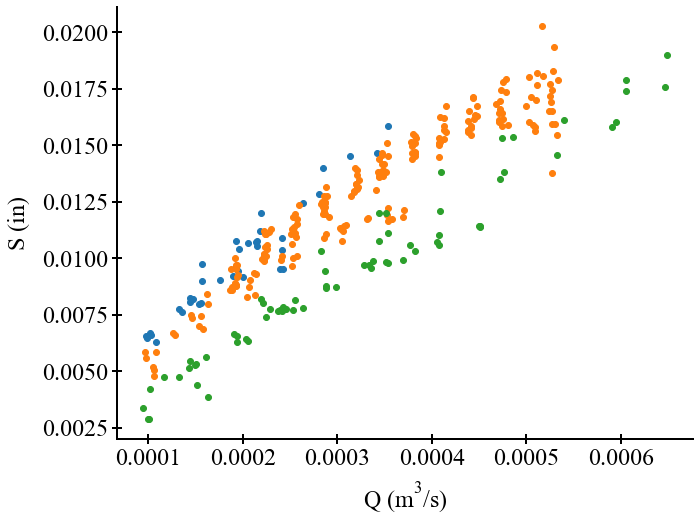

In [7]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Collect all the font names available to matplotlib
#font_names = [f.name for f in fm.fontManager.ttflist]
#print(font_names)

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
# (width, height) in inches
fig = plt.figure(figsize=(8, 6))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Add two axes objects to create an inset figure
#ax1 = fig.add_axes([0, 0, 1, 1])
#ax2 = fig.add_axes([0.5, 0.5, 0.4, 0.4])

# Hide the top and right spines of the axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')

# Add the x-axis label with λ for wavelength
ax.set_xlabel(r'Q ($\mathregular{m^3/s}$)', labelpad=10)
ax.set_ylabel(r'S ($\mathregular{in}$)', labelpad=10)

# Plot and show our data
groups = data_single.groupby("dia")
for name, group in groups:
    ax.plot(group['Q'], group['S'],'o',label = name)

#ax.legend(loc='upper left', frameon=True)

# Save the figure
fig.savefig('C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\output\\Q_vs_S.png', dpi=300, transparent=False, bbox_inches='tight')


plt.show()

In [8]:
group['Q']

152    0.000116
153    0.000255
154    0.000450
155    0.000369
156    0.000194
         ...   
285    0.000377
286    0.000407
287    0.000243
288    0.000149
289    0.000328
Name: Q, Length: 68, dtype: float64